### Load in required packages

In [38]:
import pandas as pd
from datetime import datetime, timedelta
import plotly.express as px

In [39]:
# Set pandas option
pd.set_option('future.no_silent_downcasting', True)

# Import the CSV file
df = pd.read_csv("bike_data.csv")

# Clean up some columns
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y")
df["datetime"] = df["date"] + pd.to_timedelta(df["hour"], unit="h")

# Clean up is_holiday column
df["is_holiday"] = df["is_holiday"].replace({"No Holiday": False, "Holiday": True}).astype(bool)

# Clean up is_functioning column
df["is_functioning"] = df["is_functioning"].replace({"Yes": True, "No": False}).astype(bool)

# Filter out rows where 'is_functioning' is False
df = df.query('is_functioning')

# Print out the first few rows of the cleaned dataframe
print(df.head())


        date  n_rented_bikes  hour  temperature_celsius  humidity_pct  \
0 2017-12-01             254     0                 -5.2            37   
1 2017-12-01             204     1                 -5.5            38   
2 2017-12-01             173     2                 -6.0            39   
3 2017-12-01             107     3                 -6.2            40   
4 2017-12-01              78     4                 -6.0            36   

   wind_speed_mps  visibility_10m  dew_point_temp_c  solar_radiation  \
0             2.2            2000             -17.6              0.0   
1             0.8            2000             -17.6              0.0   
2             1.0            2000             -17.7              0.0   
3             0.9            2000             -17.6              0.0   
4             2.3            2000             -18.6              0.0   

   rainfall_mm  snowfall_cm  season  is_holiday  is_functioning  \
0          0.0          0.0  Winter       False            Tr

### Visualize bike rentals over time

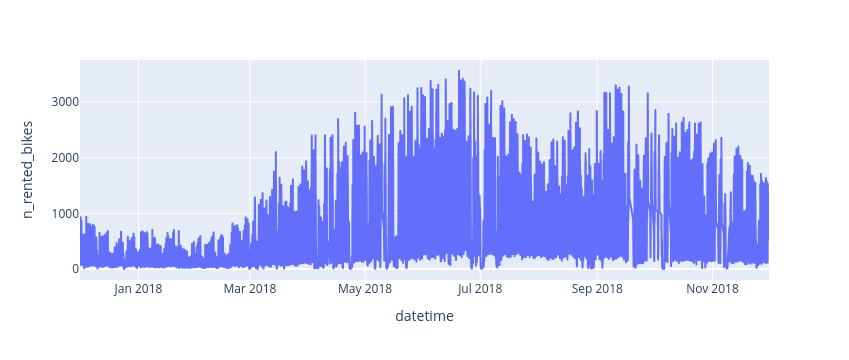

In [40]:
# Create a line plot of rented bikes over time
px.line(df, x="datetime", y="n_rented_bikes")

In [41]:
# Calculate the total number of rented bikes per day

by_day = df.groupby("date", as_index=False).agg({"n_rented_bikes": "sum"})
# Create a line plot showing total number of bikes per day over time
px.line(by_day, x='date', y='n_rented_bikes')

In [42]:
# Copy the previous chain of manipulations and add season as a variable to group by
by_day_season = df.groupby(["date", "season"], as_index=False).agg({"n_rented_bikes": "sum"})

# Copy the code for the previous line plot and map season to color
px.line(by_day_season, x='date', y='n_rented_bikes', color='season')

### Explore the relation between weather and rentals

In [43]:
# Copy and update the code for the previous scatter plot 
noon_rides = df.query('hour == 12')
# to investigate relation with other weather parameters
px.scatter(noon_rides, x ='temperature_celsius', y = 'n_rented_bikes', trendline='lowess')

### Explore typical daily usage pattern

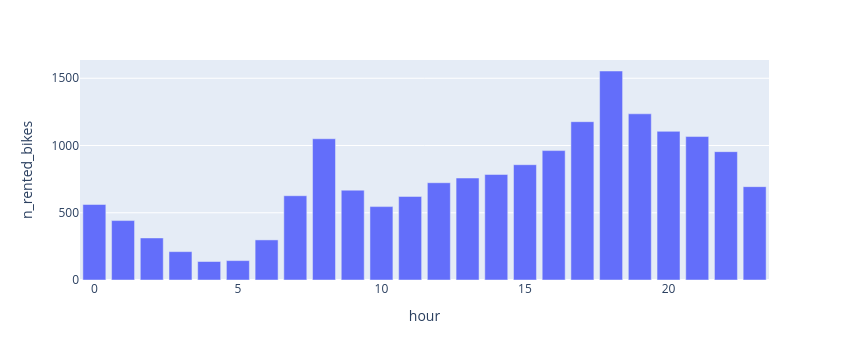

In [44]:
# Calculate the average number of rented bikes per hour
time_of_day = df.groupby("hour", as_index=False).agg({"n_rented_bikes":"mean"})
# Create a bar chart showing the usage pattern
px.bar(time_of_day, x="hour", y = "n_rented_bikes")

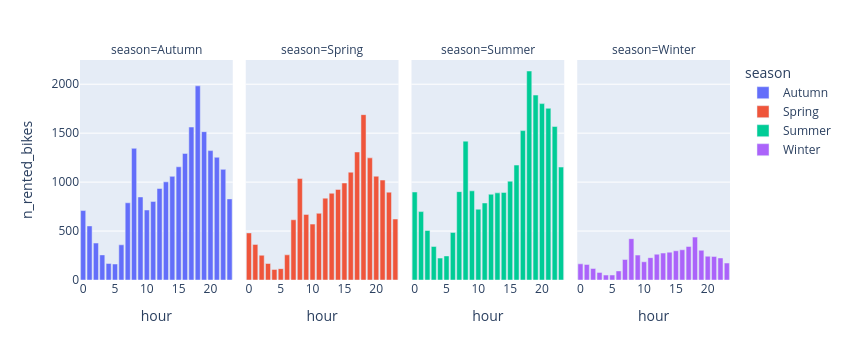

In [45]:
# Group by hour and season to get the average number of rented bikes
time_of_day_season = df.groupby(["hour", "season"], as_index=False).agg({"n_rented_bikes": "mean"})

# Create a bar chart showing usage pattern per season
px.bar(time_of_day_season, x="hour", y="n_rented_bikes", color="season", facet_col="season")


### Extra: is New Year's Eve different?

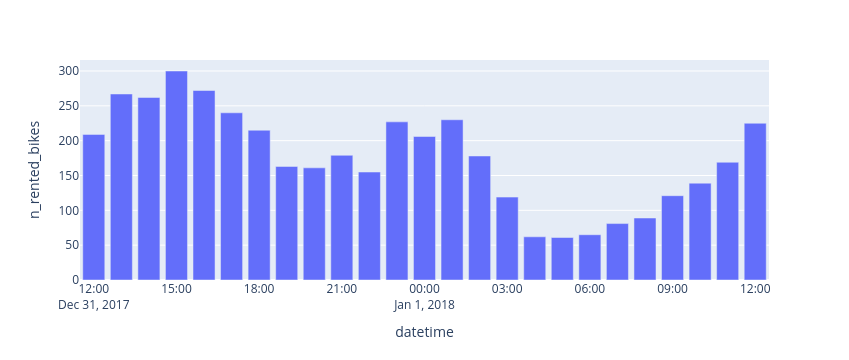

In [48]:
# Define start and end datetime for New Year's
new_years_start = datetime(2017, 12, 31, 12)
new_years_end = datetime(2018, 1, 1, 12)

# Correct the query string (fixed parentheses and variable references)
new_year = df.query("@new_years_start <= datetime <= @new_years_end")

# Show usage pattern (assumes `new_year` is the filtered DataFrame)
import plotly.express as px
px.bar(new_year, x='datetime', y='n_rented_bikes')